In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

In [30]:
class Agent:
    def __init__(self,cell):
        self.pos = cell
        cell.occupants.append(self)
        
    def diffuse(self):
        self.pos =  self.pos.move(self)

In [61]:
class Cell:
    def __init__(self,pos):
        self.pos=pos
        self.occupants = []
        self.neighbours=[self,self,self]
    
    def move(self,agent):
        to = rnd.randint(0,2)
        if rnd.random()<((abs(self.pos-50)*0.1)/50):
            if self.pos-50<0:
                to = 2
            else:
                to = 0
        if to !=1:
            self.occupants.remove(agent)
            self.neighbours[to].occupants.append(agent)
            return self.neighbours[to]
        return self
    

In [62]:
class World:
    def __init__(self,size,agents):
        cells = [Cell(x) for x in range(size)]
        for i in range(1,size-1):
            cells[i].neighbours[0]=(cells[i-1])
            cells[i].neighbours[1]=(cells[i])
            cells[i].neighbours[2]=(cells[i+1])
        self.cells = cells
        self.agents=[Agent(cells[math.floor(size/2)]) for _ in range(agents)]
        
    def iterate(self):
        for  a in self.agents:
            a.diffuse()
            

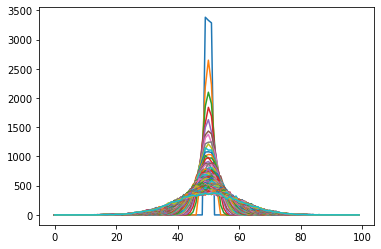

In [66]:
world = World(100,10000)
for i in range(300):
    world.iterate()
    if i% 2==0:
        plt.plot([len(cell.occupants) for cell in world.cells])
plt.show()

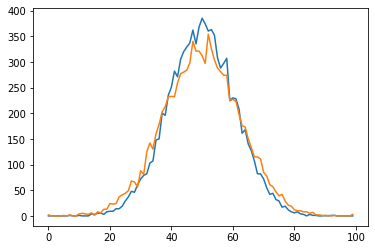

In [67]:
#plt.hist([len(cell.occupants) for cell in world.cells])
plt.plot([len(cell.occupants) for cell in world.cells])
for i in range(300):
    world.iterate()
plt.plot([len(cell.occupants) for cell in world.cells])
plt.show()

100 100
RMSE: 8.529989703592557
R-squared: 0.9943508787126784


/tmp/ipykernel_4773/436773908.py:13: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


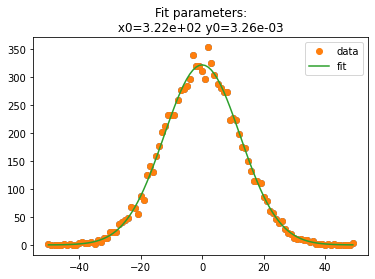

In [68]:
from scipy.optimize import curve_fit
xdata = [i for i in range(-50,50)]
ydata = [len(cell.occupants) for cell in world.cells]
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))


print('RMSE:', RMSE)
print('R-squared:', Rsquared)

In [69]:
fit

array([3.22418159e+02, 3.26331698e-03])